In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
import os

train_dir = "C:\\Users\\HP\\Downloads\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\train"
print("Path Exists:", os.path.exists(train_dir))
print("Contents:", os.listdir(train_dir) if os.path.exists(train_dir) else "Does not exist")

Path Exists: True
Contents: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [5]:
train_dir = "C:\\Users\\HP\\Downloads\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\train"
val_dir = "C:\\Users\\HP\\Downloads\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\val"
test_dir = "C:\\Users\\HP\\Downloads\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\test"

img_size = (292, 292)
batch_size = 32

In [6]:
# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize to [0,1]
    rotation_range=20,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.2,    # Width shift
    height_shift_range=0.2,   # Height shift
    shear_range=0.15,         # Shear transform
    fill_mode='nearest'       # Filling in new pixels
)

In [7]:
# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [8]:
!pip install Pillow


In [9]:
import PIL
print(PIL.__version__)

11.2.1


In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
train_dir = "C:\\Users\\HP\\Downloads\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\train"


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.


Shape of image batch: (32, 224, 224, 3)
Min pixel value: 0.0
Max pixel value: 1.0


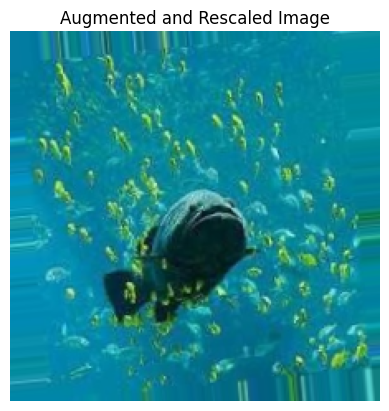

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)

# Check shape and pixel range
print("Shape of image batch:", images.shape)
print("Min pixel value:", np.min(images))
print("Max pixel value:", np.max(images))

# Show one example image
plt.imshow(images[0])
plt.title("Augmented and Rescaled Image")
plt.axis('off')
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(292, 292, 3)))  # First conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))                                     # Downsampling

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into Dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))  # softmax for multiclass




c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
!pip install scipy

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Set directory paths and parameters
base_dir = "C:\\Users\\HP\\Downloads\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\val"
val_dir = f"{base_dir}/val"

# Image size and batch size
img_size = (224, 224)
batch_size = 32

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1092 images belonging to 11 classes.


In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Number of classes in your dataset
num_classes = train_generator.num_classes  # Should be 11 for fish dataset

# Final Dense layer must match this
Dense(num_classes, activation='softmax')

<Dense name=dense_2, built=False>

In [21]:
print(model.layers[-1])

<Dense name=dense_1, built=True>


In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [23]:
model.build(input_shape=(None, 224, 224, 3))


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(100,)))  # Now it's built
print(model.summary())  # ✅ Shows full layer details

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010 (3.95 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010 (3.95 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 5

# Dataset paths
base_dir = r"C:\Users\HP\Downloads\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.2574 - loss: 2.2388 - val_accuracy: 0.5916 - val_loss: 1.1589
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.5101 - loss: 1.3477 - val_accuracy: 0.7592 - val_loss: 0.7801
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.6177 - loss: 1.0606 - val_accuracy: 0.8242 - val_loss: 0.5647
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.6819 - loss: 0.8702 - val_accuracy: 0.8553 - val_loss: 0.5060
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.7336 - loss: 0.7561 - val_accuracy: 0.8636 - val_loss: 0.4317


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Create the data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load the test dataset from the correct path
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\HP\Downloads\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test',
    target_size=(224, 224),        # Match this to your model's expected input
    batch_size=32,
    class_mode='categorical',      # Use 'binary' if only 2 classes
    shuffle=False
)

# Step 3: Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy * 100:.2f}%")

Found 3187 images belonging to 11 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 225ms/step - accuracy: 0.8690 - loss: 0.3701
Test accuracy: 83.75%


In [29]:
# Classification Report (Precision, Recall, F1)
from sklearn.metrics import classification_report

# Predict on test data
y_probs = model.predict(test_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print detailed report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report of CNN:\n", report)

100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 243ms/step
Classification Report of CNN:
                                   precision    recall  f1-score   support

                     animal fish       0.96      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.91      0.87      0.89       298
   fish sea_food gilt_head_bream       0.73      0.39      0.51       305
   fish sea_food hourse_mackerel       0.82      0.96      0.88       286
        fish sea_food red_mullet       0.97      0.95      0.96       291
     fish sea_food red_sea_bream       0.51      0.95      0.67       273
          fish sea_food sea_bass       0.80      0.59      0.68       327
            fish sea_food shrimp       0.89      1.00      0.94       289
fish sea_food striped_red_mullet       0.89      0.77      0.83       293
             fish sea_food trout       1.00      0.90      0.94       292

                        accuracy   

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix of CNN:\n", cm)

Confusion Matrix of CNN:
 [[514   0   1   1   1   3   0   0   0   0   0]
 [ 12   0   0   0   0   1   0   0   0   0   0]
 [  0   0 258   0  17   0   0  19   0   4   0]
 [  0   0   0 119   9   0 164  10   0   2   1]
 [  0   0   6   0 274   0   0   6   0   0   0]
 [  7   0   0   0   0 275   0   0   0   9   0]
 [  0   0   0   0   9   0 259   5   0   0   0]
 [  0   0  19  33   6   0  63 194   0  12   0]
 [  0   0   0   0   0   0   0   0 288   1   0]
 [  0   0   0   0   7   5  10   9  36 226   0]
 [  0   0   0  10  11   0   9   0   0   0 262]]


In [38]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\HP\Downloads\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train\animal fish\WXCW34K3ZXPS.jpg"

# Resize to 224x224 (very important)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Final shape: (1, 224, 224, 3)

# Predict
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]

# Labels from training
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

print(f"✅ Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
✅ Predicted class: animal fish


In [40]:
# 5 Pre-Model Training
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [41]:
# VGG16 — Transfer Learning & Fine-tuning

Num_classes = 11
Epochs = 5
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load base model (exclude top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(Num_classes, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save only best model
checkpoint = ModelCheckpoint('vgg16_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint, early_stop]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1499 - loss: 2.4788

195/195 ━━━━━━━━━━━━━━━━━━━━ 1395s 7s/step - accuracy: 0.1501 - loss: 2.4780 - val_accuracy: 0.4029 - val_loss: 2.0190
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2892 - loss: 2.0416

195/195 ━━━━━━━━━━━━━━━━━━━━ 1310s 7s/step - accuracy: 0.2893 - loss: 2.0413 - val_accuracy: 0.5467 - val_loss: 1.8030
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3958 - loss: 1.8298

195/195 ━━━━━━━━━━━━━━━━━━━━ 1248s 6s/step - accuracy: 0.3960 - loss: 1.8296 - val_accuracy: 0.6438 - val_loss: 1.6397
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4943 - loss: 1.6504

195/195 ━━━━━━━━━━━━━━━━━━━━ 1208s 6s/step - accuracy: 0.4944 - loss: 1.6502 - val_accuracy: 0.6896 - val_loss: 1.5043
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5470 - loss: 1.5336

195/195 ━━━━━━━━━━━━━━━━━━━━ 1211s 6s/step - accuracy: 0.5471 - loss: 1.5335 - val_accuracy: 0.7216 - val_loss: 1.3805


In [43]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
model_resnet = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model_resnet.fit(train_generator, validation_data=val_generator, epochs=5)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 0.1682 - loss: 2.3047 - val_accuracy: 0.2253 - val_loss: 2.1202
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.2281 - loss: 2.1038 - val_accuracy: 0.2775 - val_loss: 1.9987
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 460s 2s/step - accuracy: 0.2826 - loss: 1.9730 - val_accuracy: 0.3288 - val_loss: 1.8688
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.3035 - loss: 1.9316 - val_accuracy: 0.3068 - val_loss: 1.8357
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.3490 - loss: 1.8455 - val_accuracy: 0.3919 - val_loss: 1.8420


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.96      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.91      0.87      0.89       298
   fish sea_food gilt_head_bream       0.73      0.39      0.51       305
   fish sea_food hourse_mackerel       0.82      0.96      0.88       286
        fish sea_food red_mullet       0.97      0.95      0.96       291
     fish sea_food red_sea_bream       0.51      0.95      0.67       273
          fish sea_food sea_bass       0.80      0.59      0.68       327
            fish sea_food shrimp       0.89      1.00      0.94       289
fish sea_food striped_red_mullet       0.89      0.77      0.83       293
             fish sea_food trout       1.00      0.90      0.94       292

                        accuracy           

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

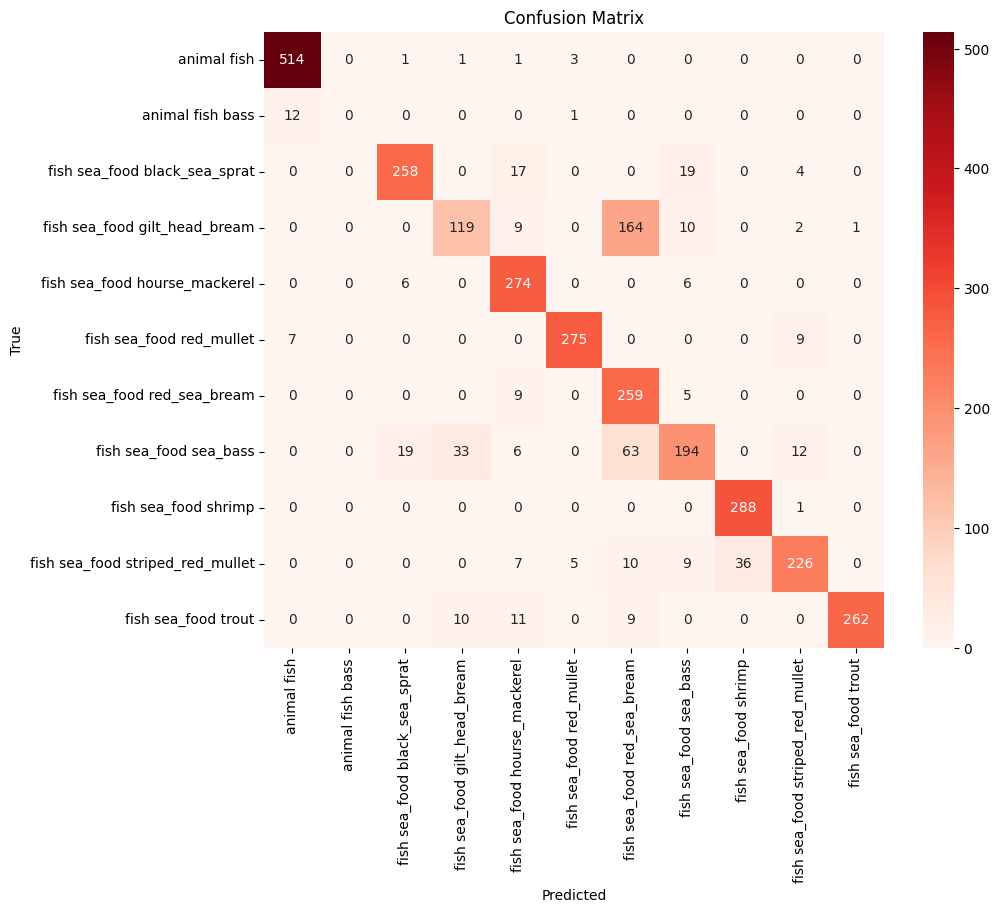

In [44]:
# Predict on test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

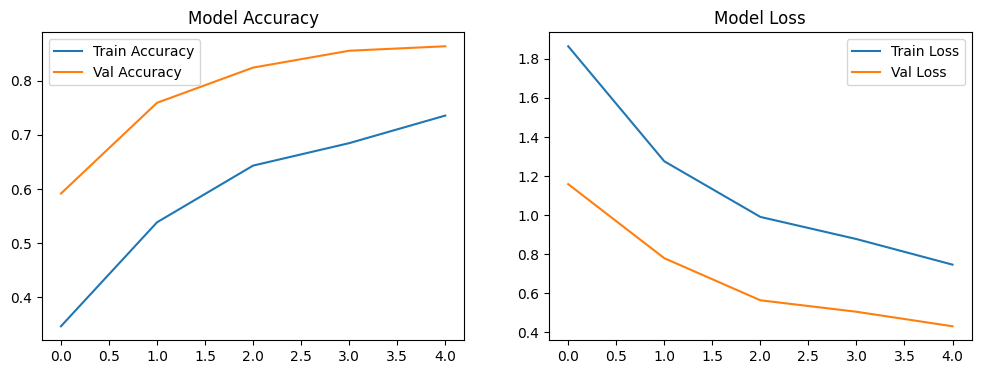

In [46]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [48]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)

# Freeze base layers (fine-tune later)
for layer in base_model.layers:
    layer.trainable = False

model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train and save history
history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)



Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 37258s 192s/step - accuracy: 0.1882 - loss: 2.2805 - val_accuracy: 0.2244 - val_loss: 2.0794
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.2613 - loss: 2.0743 - val_accuracy: 0.2555 - val_loss: 2.0124
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.2797 - loss: 2.0068 - val_accuracy: 0.3599 - val_loss: 1.8528
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.3221 - loss: 1.9079 - val_accuracy: 0.3571 - val_loss: 1.8023
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.3425 - loss: 1.8388 - val_accuracy: 0.3178 - val_loss: 1.8145
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.3751 - loss: 1.7803 - val_accuracy: 0.3984 - val_loss: 1.7930
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.3785 - loss: 1.7427 - val_accuracy: 0.4405 - val_loss: 1.6256
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.4120 - loss: 1.6690 - val_

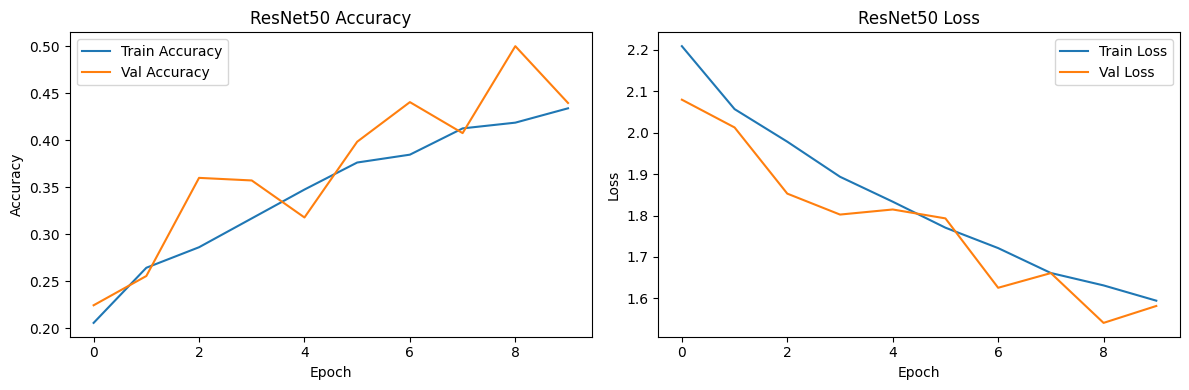

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
# MobileNet

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [51]:
# Load pre-trained MobileNet model without top
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_mobile.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [52]:
checkpoint_mobile = ModelCheckpoint("mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.7502 - loss: 0.8310

195/195 ━━━━━━━━━━━━━━━━━━━━ 177s 888ms/step - accuracy: 0.7509 - loss: 0.8286 - val_accuracy: 0.9881 - val_loss: 0.0719
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 932ms/step - accuracy: 0.9826 - loss: 0.0696 - val_accuracy: 0.9881 - val_loss: 0.0435
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.9903 - loss: 0.0369

195/195 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9903 - loss: 0.0369 - val_accuracy: 0.9936 - val_loss: 0.0240
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9930 - loss: 0.0262 - val_accuracy: 0.9927 - val_loss: 0.0185
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9942 - loss: 0.0203 - val_accuracy: 0.9936 - val_loss: 0.0247


100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 513ms/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.99      0.99      0.99       520
                animal fish bass       0.90      0.69      0.78        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       0.98      1.00      0.99       286
        fish sea_food red_mullet       0.99      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.97      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accur

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

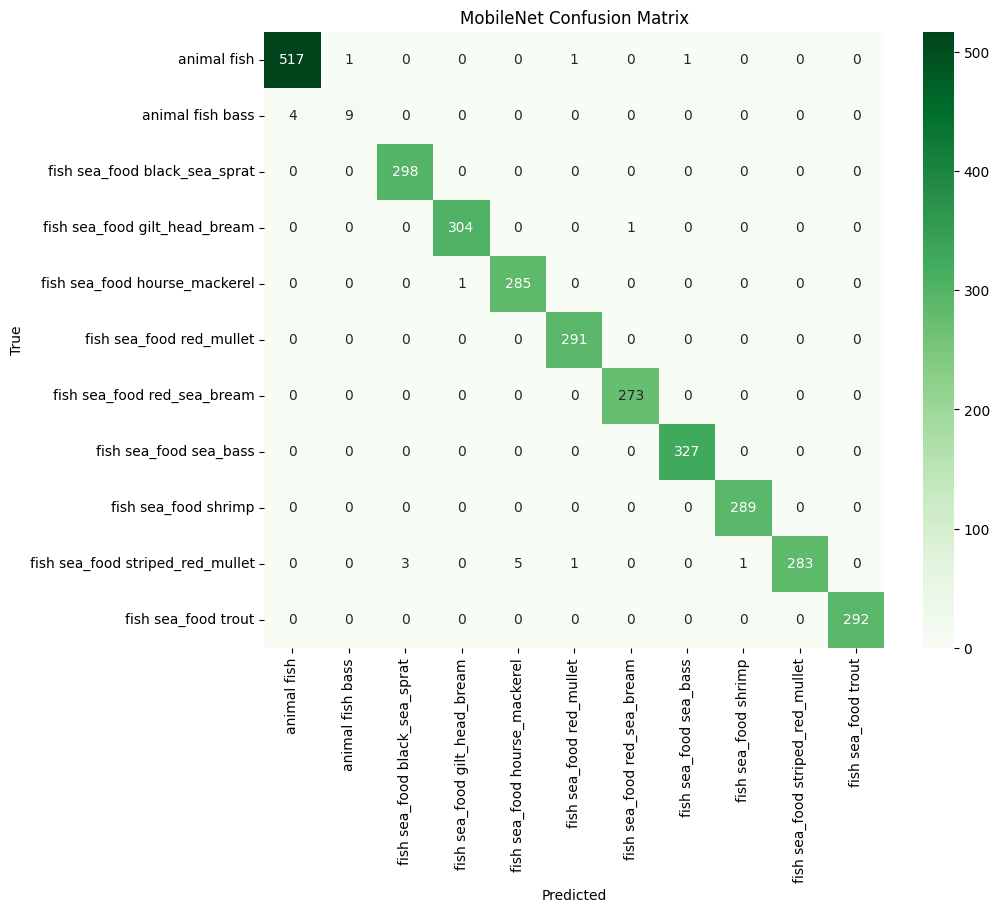

In [53]:
# Predict test set
Y_pred_mobile = model_mobile.predict(test_generator)
y_pred_mobile = np.argmax(Y_pred_mobile, axis=1)

# Classification report
report_mobilenet = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for MobileNet:")
print(classification_report(test_generator.classes, y_pred_mobile, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_mobile = confusion_matrix(test_generator.classes, y_pred_mobile)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mobile, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Greens')
plt.title('MobileNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

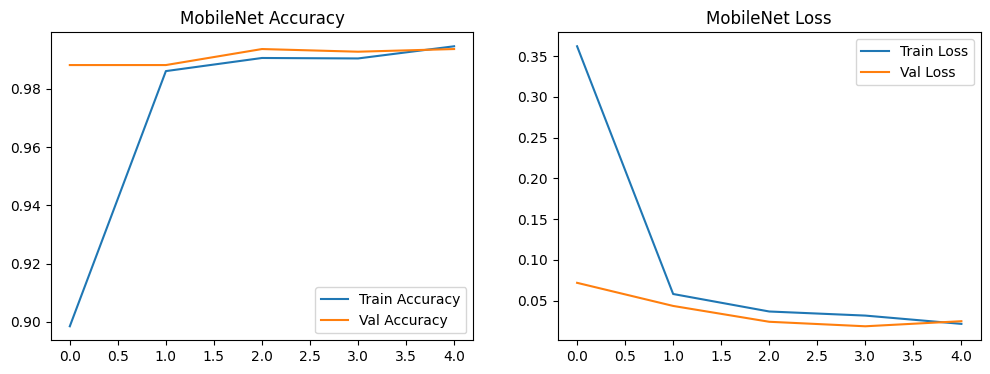

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNet Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Val Loss')
plt.title('MobileNet Loss')
plt.legend()
plt.show()

In [55]:
# InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [56]:
# Load pre-trained InceptionV3 without top
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_inception.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_inception = Model(inputs=base_model_inception.input, outputs=output)

# Compile the model
model_inception.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [57]:
checkpoint_inception = ModelCheckpoint("inception_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_inception, early_stop_inception]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7242 - loss: 0.9054

195/195 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.7249 - loss: 0.9031 - val_accuracy: 0.9469 - val_loss: 0.1776
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9477 - loss: 0.1646

195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9477 - loss: 0.1645 - val_accuracy: 0.9679 - val_loss: 0.1167
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9609 - loss: 0.1063 - val_accuracy: 0.9597 - val_loss: 0.1235
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.9675 - loss: 0.0961 - val_accuracy: 0.9661 - val_loss: 0.1018
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.9674 - loss: 0.0760 - val_accuracy: 0.9615 - val_loss: 0.1343


100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.96      1.00      0.98       520
                animal fish bass       1.00      0.23      0.38        13
   fish sea_food black_sea_sprat       1.00      0.95      0.97       298
   fish sea_food gilt_head_bream       0.98      0.99      0.98       305
   fish sea_food hourse_mackerel       0.97      0.98      0.97       286
        fish sea_food red_mullet       0.97      0.98      0.97       291
     fish sea_food red_sea_bream       1.00      0.98      0.99       273
          fish sea_food sea_bass       0.97      0.95      0.96       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.93      0.95      0.94       293
             fish sea_food trout       0.98      1.00      0.99       292

                        accur

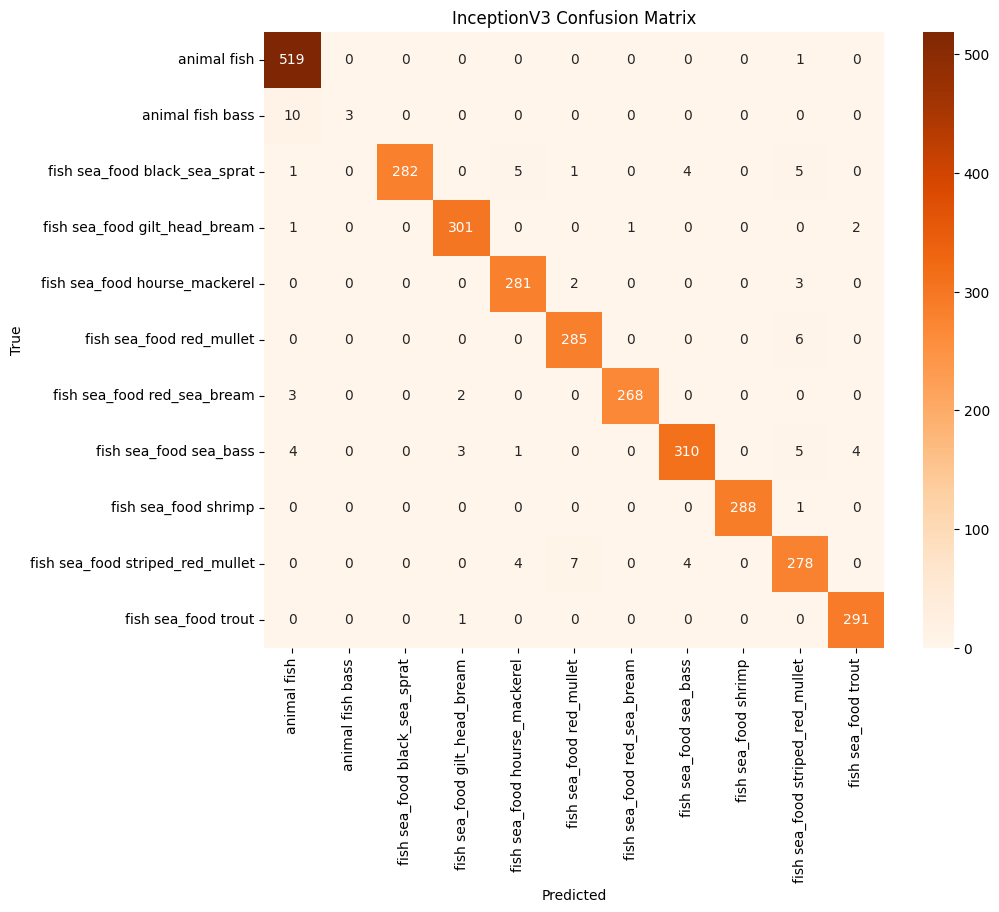

In [58]:
# Predict test set
Y_pred_inception = model_inception.predict(test_generator)
y_pred_inception = np.argmax(Y_pred_inception, axis=1)

# Classification report
report_inception = classification_report(y_true, y_pred_inception, target_names=class_labels, output_dict=True)
print("Classification Report for InceptionV3:")
print(classification_report(test_generator.classes, y_pred_inception, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_inception = confusion_matrix(test_generator.classes, y_pred_inception)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_inception, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Oranges')
plt.title('InceptionV3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

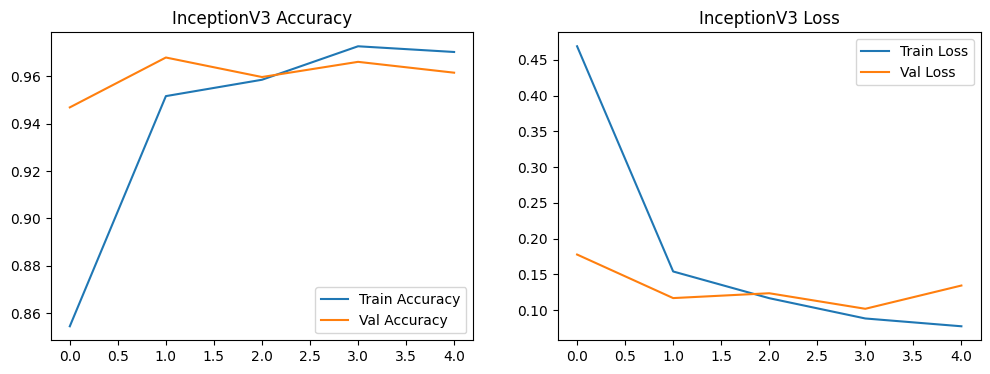

In [59]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Val Accuracy')
plt.title('InceptionV3 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Val Loss')
plt.title('InceptionV3 Loss')
plt.legend()
plt.show()

In [60]:
# EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [61]:
# Load pre-trained EfficientNetB0 without top
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_efficientnet.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_efficientnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=output)

# Compile the model
model_efficientnet.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [62]:
checkpoint_efficientnet = ModelCheckpoint("efficientnet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_efficientnet = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_efficientnet, early_stop_efficientnet]
) 

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.1484 - loss: 2.3364

195/195 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.1484 - loss: 2.3363 - val_accuracy: 0.1712 - val_loss: 2.3203
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.1700 - loss: 2.3082 - val_accuracy: 0.1712 - val_loss: 2.3169
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.1735 - loss: 2.3025 - val_accuracy: 0.1712 - val_loss: 2.3151
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.1798 - loss: 2.3015 - val_accuracy: 0.1712 - val_loss: 2.3149


100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 637ms/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

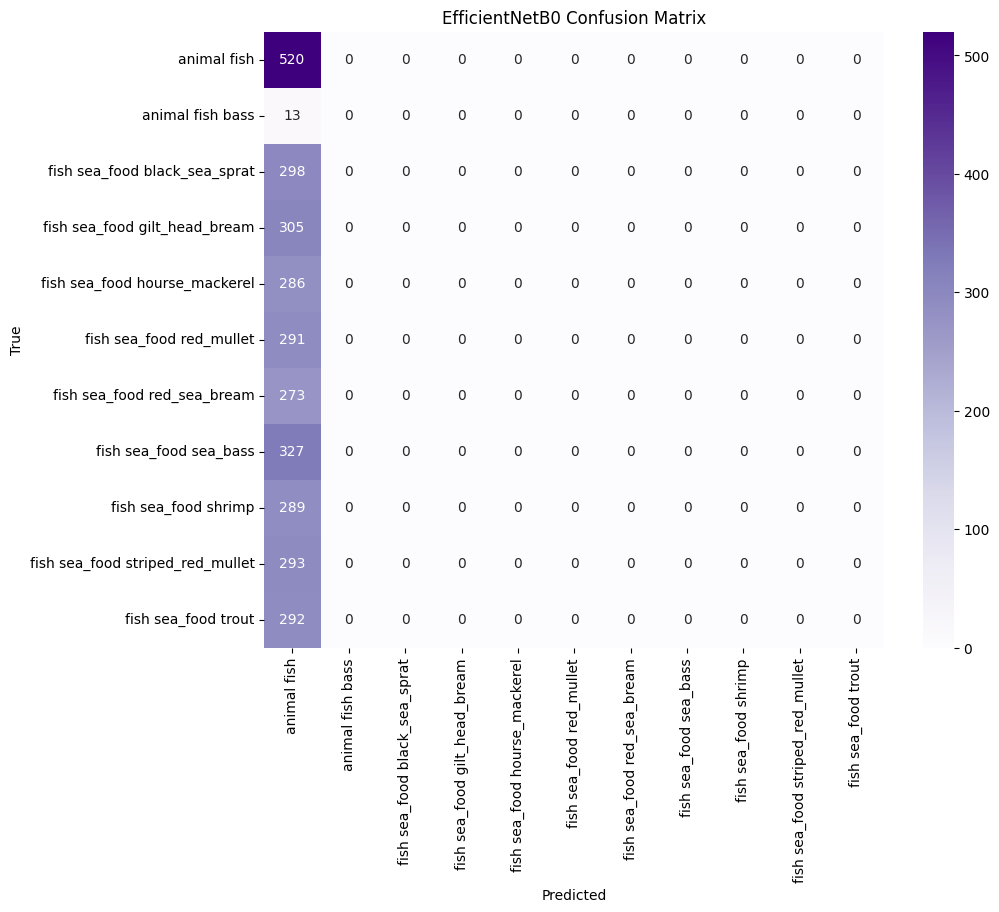

In [63]:
# Predict test set
Y_pred_efficientnet = model_efficientnet.predict(test_generator)
y_pred_efficientnet = np.argmax(Y_pred_efficientnet, axis=1)

# Classification report
report_effnet = classification_report(y_true, y_pred_efficientnet, target_names=class_labels, output_dict=True)
print("Classification Report for EfficientNetB0:")
print(classification_report(test_generator.classes, y_pred_efficientnet, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_efficientnet = confusion_matrix(test_generator.classes, y_pred_efficientnet)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_efficientnet, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Purples')
plt.title('EfficientNetB0 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

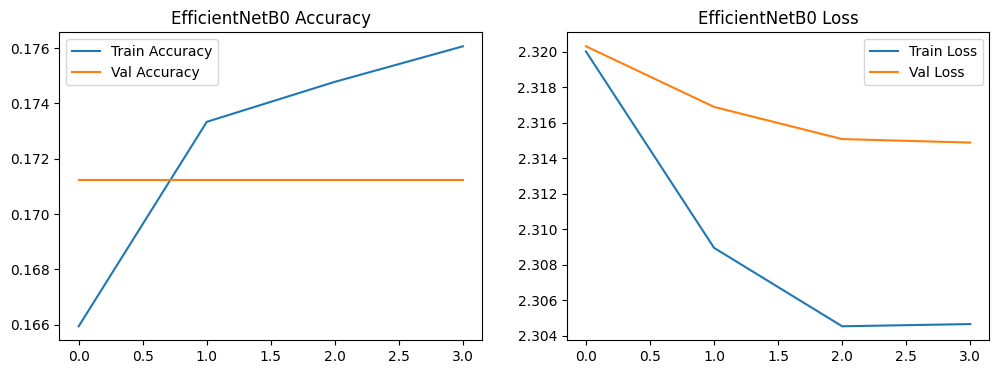

In [64]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_efficientnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Val Accuracy')
plt.title('EfficientNetB0 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_efficientnet.history['loss'], label='Train Loss')
plt.plot(history_efficientnet.history['val_loss'], label='Val Loss')
plt.title('EfficientNetB0 Loss')
plt.legend()
plt.show()

In [68]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load base VGG16 model
base_model_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model_vgg.layers:
    layer.trainable = False

# Add custom head
x = GlobalAveragePooling2D()(base_model_vgg.output)
x = Dense(256, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model_vgg.input, outputs=output)

model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train it (store history if needed)
history_vgg = model_vgg.fit(train_generator, validation_data=val_generator, epochs=5)

# Optionally save it
model_vgg.save("model_vgg.h5")




Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1381s 7s/step - accuracy: 0.4247 - loss: 1.7786 - val_accuracy: 0.8288 - val_loss: 0.8081
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 106160s 547s/step - accuracy: 0.8248 - loss: 0.7398 - val_accuracy: 0.8462 - val_loss: 0.5405
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 71010s 366s/step - accuracy: 0.8734 - loss: 0.4604 - val_accuracy: 0.8974 - val_loss: 0.3737
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1473s 8s/step - accuracy: 0.9111 - loss: 0.3489 - val_accuracy: 0.9212 - val_loss: 0.2866
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 13763s 71s/step - accuracy: 0.9235 - loss: 0.2759 - val_accuracy: 0.9286 - val_loss: 0.2284


In [69]:
y_pred_vgg = np.argmax(model_vgg.predict(test_generator), axis=1)


100/100 ━━━━━━━━━━━━━━━━━━━━ 613s 6s/step


In [73]:
from tensorflow.keras.models import load_model

model_mobilenet = load_model(r"C:\Users\HP\Downloads\mobilenet_model.h5")

In [77]:
#Make predictions on test set 
import numpy as np

# Predict class probabilities
y_pred_mobilenet = np.argmax(model_mobilenet.predict(test_generator),axis = 1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 459ms/step


In [79]:
#Generate the Classification Report

from sklearn.metrics import classification_report

y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report_mobilenet = classification_report(
    y_true, y_pred_mobilenet,
    target_names=class_labels,
    output_dict=True
)

In [80]:
#4. (Optional) Print Report

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

                                  precision    recall  f1-score   support

                     animal fish       0.99      0.99      0.99       520
                animal fish bass       0.90      0.69      0.78        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       0.98      1.00      0.99       286
        fish sea_food red_mullet       0.99      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.97      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.99      3187
                       macro avg    

In [81]:
import pandas as pd

# Combine key metrics (weighted avg) from each report
summary = {
    'Model': ['VGG16', 'ResNet50', 'MobileNet', 'InceptionV3', 'EfficientNetB0'],
    'Accuracy': [
        report_vgg['accuracy'],
        report_resnet['accuracy'],
        report_mobilenet['accuracy'],
        report_inception['accuracy'],
        report_effnet['accuracy']
    ],
    'Precision': [
        report_vgg['weighted avg']['precision'],
        report_resnet['weighted avg']['precision'],
        report_mobilenet['weighted avg']['precision'],
        report_inception['weighted avg']['precision'],
        report_effnet['weighted avg']['precision']
    ],
    'Recall': [
        report_vgg['weighted avg']['recall'],
        report_resnet['weighted avg']['recall'],
        report_mobilenet['weighted avg']['recall'],
        report_inception['weighted avg']['recall'],
        report_effnet['weighted avg']['recall']
    ],
    'F1-Score': [
        report_vgg['weighted avg']['f1-score'],
        report_resnet['weighted avg']['f1-score'],
        report_mobilenet['weighted avg']['f1-score'],
        report_inception['weighted avg']['f1-score'],
        report_effnet['weighted avg']['f1-score']
    ]
}

df_summary = pd.DataFrame(summary)
print(df_summary)

            Model  Accuracy  Precision    Recall  F1-Score
0           VGG16  0.946345   0.949022  0.946345  0.944299
1        ResNet50  0.445874   0.590164  0.445874  0.401663
2       MobileNet  0.994038   0.993985  0.994038  0.993921
3     InceptionV3  0.974584   0.974981  0.974584  0.973635
4  EfficientNetB0  0.163163   0.026622  0.163163  0.045775


In [82]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)